In [1]:
## Env hic_v0
import sys
import os
import cooler
import cooltools
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/gpfs/commons/home/ajoglekar/.conda/envs/hic_v0/lib/python3.10/site-packages/cooltools/lib/numutils.py:652: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/gpfs/commons/home/ajoglekar/.conda/envs/hic_v0/lib/python3.10/site-packages/cooltools/lib/numutils.py:727: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correc

In [2]:
cooler.fileops.list_coolers('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool')

['/resolutions/50',
 '/resolutions/100',
 '/resolutions/200',
 '/resolutions/250',
 '/resolutions/400',
 '/resolutions/500',
 '/resolutions/800',
 '/resolutions/1000',
 '/resolutions/1600',
 '/resolutions/2000',
 '/resolutions/3200',
 '/resolutions/5000',
 '/resolutions/6400',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [3]:
c1 = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/100")

In [4]:
Mast1_gene = c1.bins().fetch("chr8:85627987-85665457")

In [5]:
Mast1_gene_mat = c1.matrix(sparse=True).fetch("chr8:85627987-85665457")
Mast1_gene_mat.shape

(376, 376)

In [6]:
arr2 = Mast1_gene_mat.toarray()

In [ ]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)
# im = ax.matshow(np.log10(arr2), cmap='YlOrRd')
# fig.colorbar(im)

In [4]:
Klf1_locus_mat = c1.matrix(sparse=True).fetch("chr8:85531867-85828373")

In [5]:
clr = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/1000")
clr200 = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/200")
clr100 = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/100")
clr50 = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/50")

In [6]:
chromstarts = []
for i in clr.chromnames:
    #print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

In [7]:
## Formatting fuction:

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [11]:
# f, ax = plt.subplots(
#     figsize=(7,6))
# im = ax.matshow((clr.matrix(balance=False)[:]),vmax=500);
# plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
# ax.set(xticks=chromstarts, xticklabels=clr.chromnames,
#        xlabel='position, chrom#', ylabel='position, bin#')
# ax.xaxis.set_label_position('top')

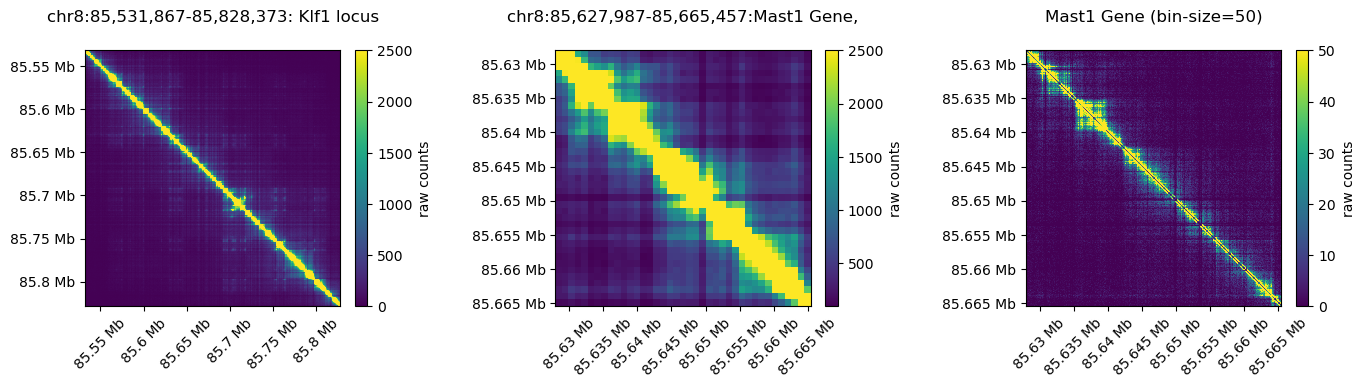

In [6]:
f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)

# ax = axs[0]
# im = ax.matshow(
#     clr.matrix(balance=False).fetch('chr5'),
#     vmax=2500,
#     extent=(0,clr.chromsizes['chr5'], clr.chromsizes['chr5'], 0)
# );
# plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
# ax.set_title('chr5', y=1.08)
# ax.set_ylabel('position, Mb')
# format_ticks(ax)

ax = axs[0]
start, end = 85_531_867, 85_828_373
region1 = ('chr8', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region1),
    vmax=2500,
    extent=(start, end, end, start)
);
ax.set_title(f'chr8:{start:,}-{end:,}: Klf1 locus', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()

ax = axs[1]
start, end = 85_627_987, 85_665_457
region2 = ('chr8', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region2),
    vmax=2500,
    extent=(start, end, end, start)
);
ax.set_title(f'chr8:{start:,}-{end:,}:Mast1 Gene,', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)

ax = axs[2]
start, end =85_627_987, 85_665_457
region2 = ('chr8', start, end)
im = ax.matshow(
    clr50.matrix(balance=False).fetch(region2),
    vmax=50,
    extent=(start, end, end, start)
);
ax.set_title(f'Mast1 Gene (bin-size=50)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()

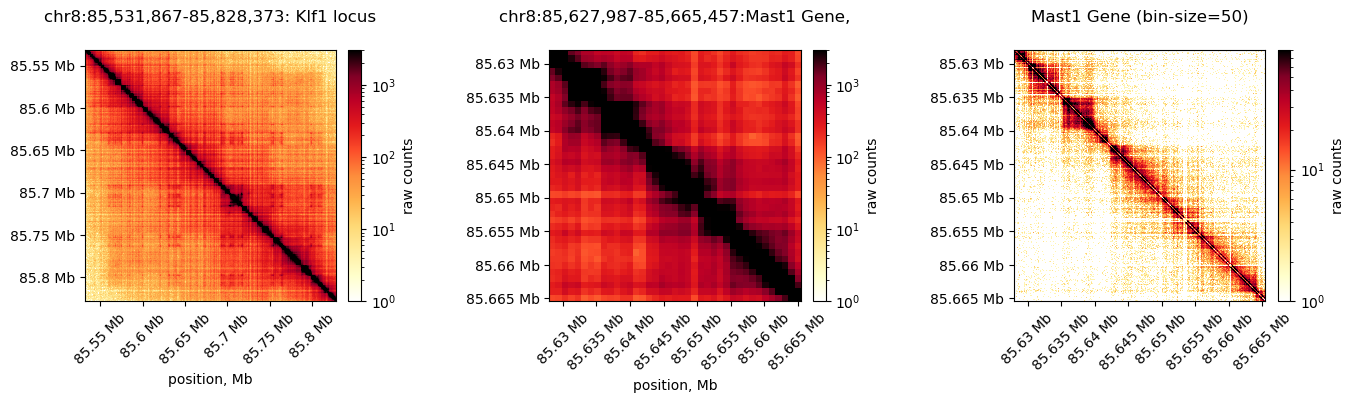

In [11]:
from matplotlib.colors import LogNorm
import cooltools.lib.plotting

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmin=1,vmax=3_000)

ax = axs[0]
start, end = 85_531_867, 85_828_373
region1 = ('chr8', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region1),
    cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr8:{start:,}-{end:,}: Klf1 locus', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[1]
start, end = 85_627_987, 85_665_457
region2 = ('chr8', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region2),
    cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr8:{start:,}-{end:,}:Mast1 Gene,', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[2]
start, end = 85_627_987, 85_665_457
region2 = ('chr8', start, end)
im = ax.matshow(
    clr50.matrix(balance=False).fetch(region2),
    cmap='fall',
    norm = LogNorm(vmin=1,vmax=80),
    extent=(start, end, end, start)
);
ax.set_title(f'Mast1 Gene (bin-size=50)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()


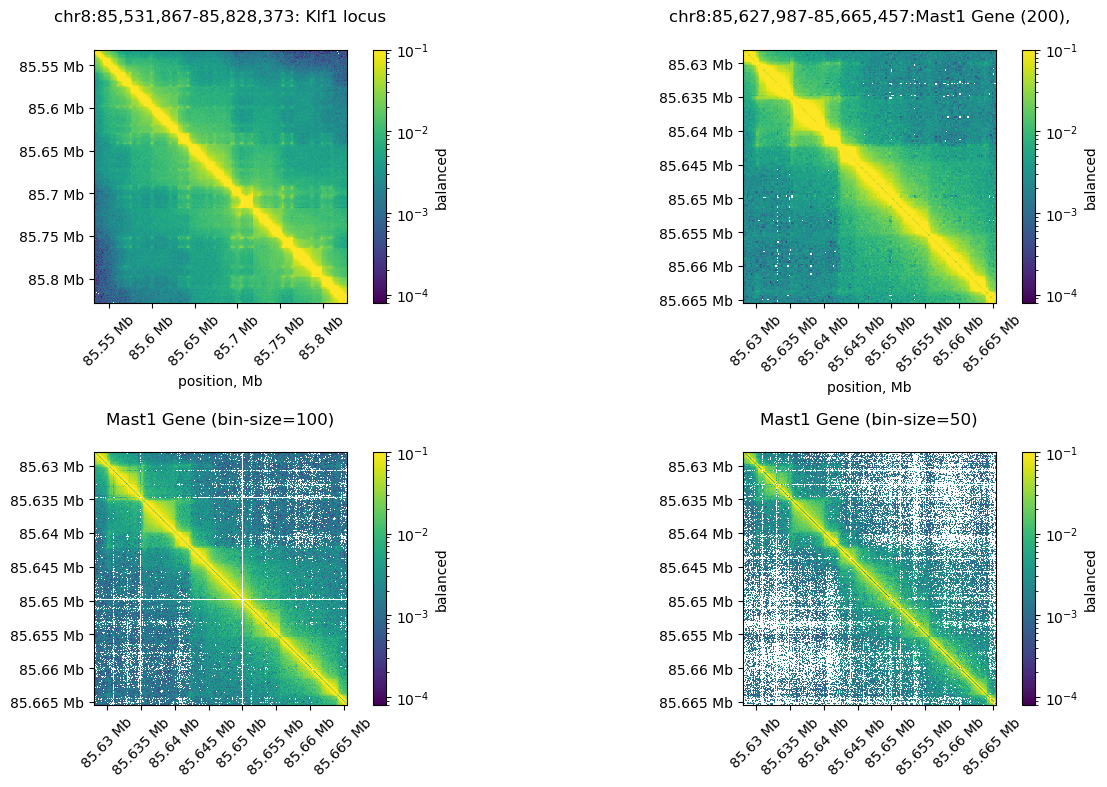

In [13]:
from matplotlib.ticker import EngFormatter
from matplotlib.colors import LogNorm
import cooltools.lib.plotting

f, axs = plt.subplots(
    figsize=(14,8),
    ncols=2, nrows = 2)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=0.1)

ax = axs[0,0]
start, end = 85_531_867, 85_828_373
region1 = ('chr8', start, end)
im = ax.matshow(
    clr.matrix().fetch(region1),
    #cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr8:{start:,}-{end:,}: Klf1 locus', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[0,1]
start, end = 85_627_987, 85_665_457
region2 = ('chr8', start, end)
im = ax.matshow(
    clr200.matrix().fetch(region2),
    #cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr8:{start:,}-{end:,}:Mast1 Gene (200),', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[1,0]
start, end = 85_627_987, 85_665_457
region2 = ('chr8', start, end)
im = ax.matshow(
    clr100.matrix().fetch(region2),
    #cmap='fall',
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'Mast1 Gene (bin-size=100)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
format_ticks(ax)

ax = axs[1,1]
start, end = 85_627_987, 85_665_457
region2 = ('chr8', start, end)
im = ax.matshow(
    clr50.matrix().fetch(region2),
    #cmap='fall',
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'Mast1 Gene (bin-size=50)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
format_ticks(ax)
plt.tight_layout()


## Add horizontal and vertical lines corresponding to exons for Mast1

In [8]:
DATA_DIR = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/"
ANNOT_DIR = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39/"
#import gffutils ## installation issues

gtf = f"{ANNOT_DIR}/gencode.vM32.annotation.gtf"
gtfLines = [x.strip('\n').split('\t') for x in open(gtf).readlines() if x[0]!="#"]
exonLines = [item for item in gtfLines if item[2] == "exon"]

In [9]:
mast1_canonicalExons = ["_".join([str(item[i]) for i in [0,3,4,6]]) for item in exonLines if "Mast1-201" in item[8]]
hook2_canonicalExons = ["_".join([str(item[i]) for i in [0,3,4,6]]) for item in exonLines if "Hook2-201" in item[8]]
best2_canonicalExons = ["_".join([str(item[i]) for i in [0,3,4,6]]) for item in exonLines if "Best2-201" in item[8]]
dnase2a_canonicalExons = ["_".join([str(item[i]) for i in [0,3,4,6]]) for item in exonLines if "Dnase2a-201" in item[8]]

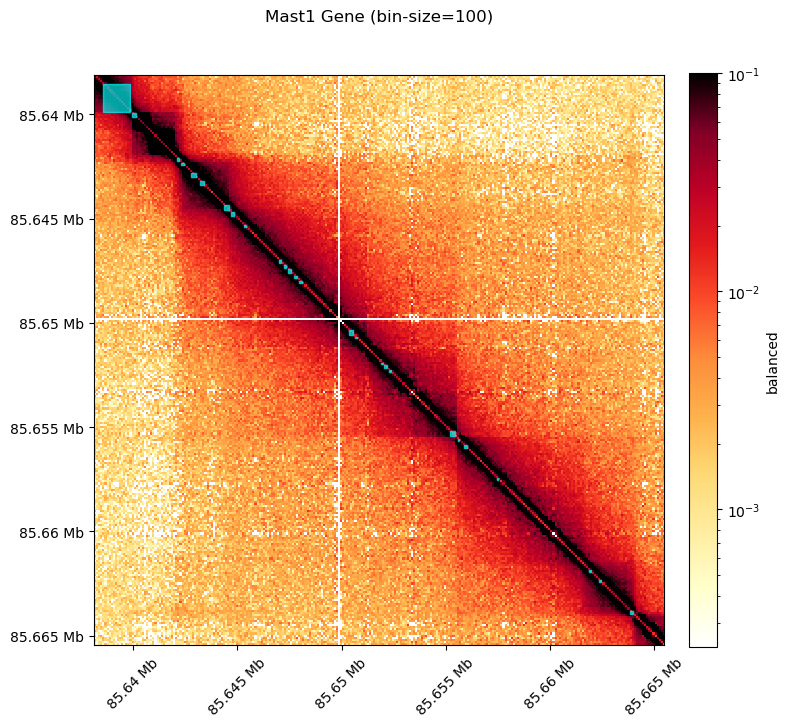

In [40]:
f, ax = plt.subplots(
    figsize=(8,8),
    ncols=1, nrows = 1)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=0.1)

start, end = 85_638_106, 85_665_457
region2 = ('chr8', start, end)
data = clr100.matrix().fetch(region2)
im = ax.matshow(
    data,
    #cmap='viridis',
    cmap='fall',
    norm = norm,
    extent=(start, end, end, start)
);

for exon in mast1_canonicalExons:
    col = "cyan"
    eS = int(exon.split("_")[1])
    eE = int(exon.split("_")[2])
    ax.fill_betweenx([eS, eE],eS, eE, color=col, alpha=0.4)
    ax.fill_between([eS, eE],eS, eE, color=col, alpha=0.4)

ax.set_title(f'Mast1 Gene (bin-size=100)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
format_ticks(ax)

plt.tight_layout()

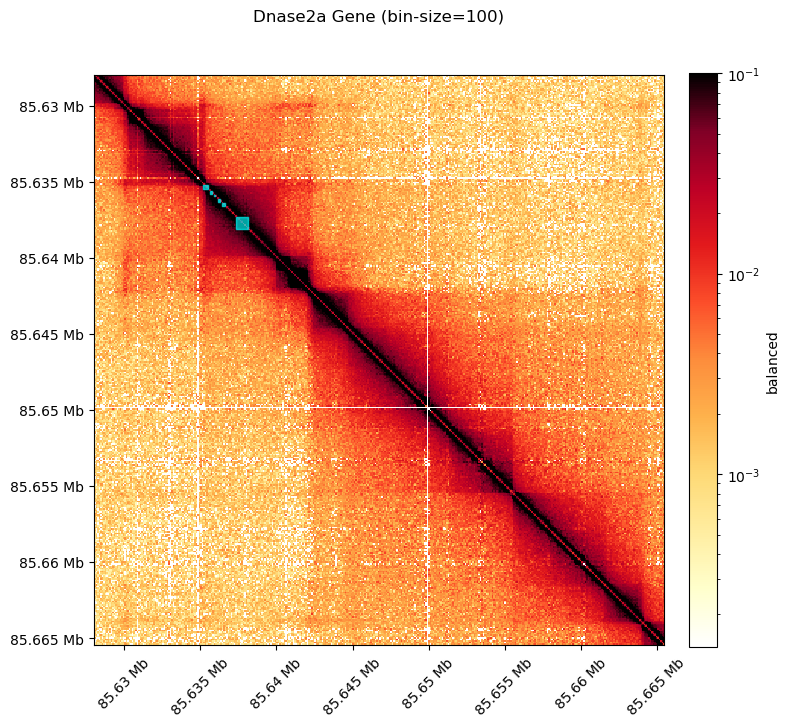

In [14]:
## Dnase2

f, ax = plt.subplots(
    figsize=(8,8),
    ncols=1, nrows = 1)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=0.1)

start, end = 85_627_987, 85_665_457
region2 = ('chr8', start, end)
data = clr100.matrix().fetch(region2)
im = ax.matshow(
    data,
    #cmap='viridis',
    cmap='fall',
    norm = norm,
    extent=(start, end, end, start)
);

for exon in dnase2a_canonicalExons:
    col = "cyan"
    eS = int(exon.split("_")[1])
    eE = int(exon.split("_")[2])
    ax.fill_betweenx([eS, eE],eS, eE, color=col, alpha=0.4)
    ax.fill_between([eS, eE],eS, eE, color=col, alpha=0.4)

ax.set_title(f'Dnase2a Gene (bin-size=100)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
format_ticks(ax)

plt.tight_layout()

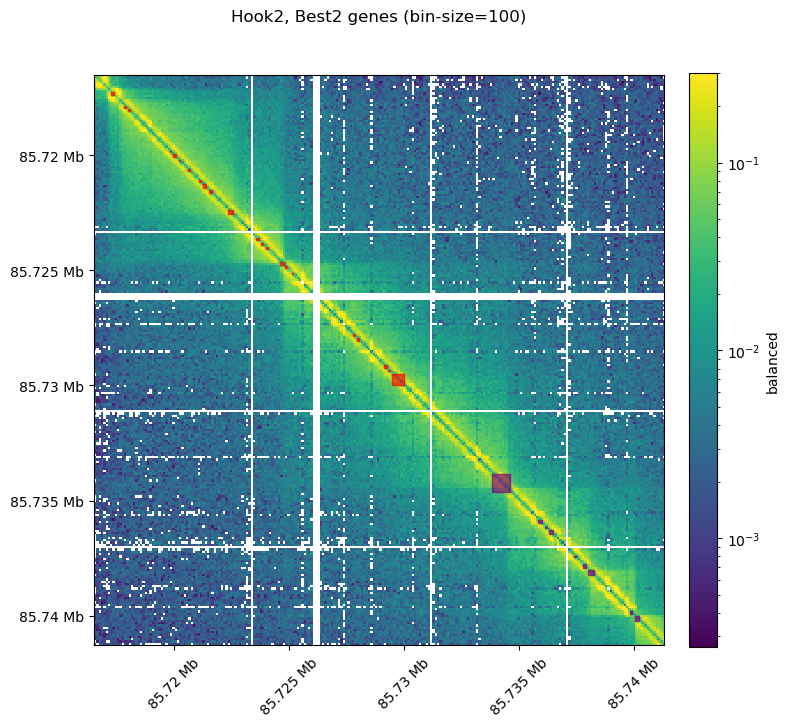

In [23]:
## Try Hook2 and Best2 genes

f, ax = plt.subplots(
    figsize=(8,8),
    ncols=1, nrows = 1)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=0.3)

start, end = 85_716_517,85_741_279
region2 = ('chr8', start, end)
data = clr100.matrix().fetch(region2)
im = ax.matshow(
    data,
    cmap='viridis',
    #cmap = 'fall',
    norm = norm,
    extent=(start, end, end, start)
);

for exon in hook2_canonicalExons:
    col = "red"
    eS = int(exon.split("_")[1])
    eE = int(exon.split("_")[2])
    ax.fill_betweenx([eS, eE],eS, eE, color=col, alpha=0.4)
    ax.fill_between([eS, eE],eS, eE, color=col, alpha=0.4)

for exon in best2_canonicalExons:
    col = "purple"
    eS = int(exon.split("_")[1])
    eE = int(exon.split("_")[2])
    ax.fill_betweenx([eS, eE],eS, eE, color=col, alpha=0.4)
    ax.fill_between([eS, eE],eS, eE, color=col, alpha=0.4)

ax.set_title(f'Hook2, Best2 genes (bin-size=100)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
format_ticks(ax)

plt.tight_layout()

In [27]:
# from cooltools.lib.numutils import adaptive_coarsegrain, interp_nan


# start, end = 85_531_867, 85_828_373
# region2 = ('chr8', start, end)
# extents = (start, end, end, start)

# cg = adaptive_coarsegrain(clr.matrix(balance=True).fetch(region2),
#                               clr.matrix(balance=False).fetch(region2)
#                                 ,cutoff=3, max_levels=8)

# cgi = interp_nan(cg)

# f, axs = plt.subplots(
#     figsize=(18,5),
#     nrows=1,
#     ncols=3,
#     sharex=True, sharey=True)

# ax = axs[0]
# im = ax.matshow(clr.matrix(balance=True).fetch(region2), cmap='fall', norm=norm, extent=extents)
# ax.set_title('corrected')

# ax = axs[1]
# im2 = ax.matshow(cg, cmap='fall', norm=norm, extent=extents)
# ax.set_title(f'adaptively coarsegrained')

# ax = axs[2]
# im3 = ax.matshow(cgi, cmap='fall', norm=norm, extent=extents)
# ax.set_title(f'interpolated')

# for ax in axs:
#     format_ticks(ax, rotate=False)

# plt.colorbar(im3, ax=axs, fraction=0.046, label='corrected frequencies')

In [21]:
import coolbox
from coolbox.api import *
from coolbox.core.track.hicmat import Cool
coolbox.__version__

'0.3.8'

In [3]:
# Here, we define const values for reference files easily later
DATA_DIR = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/"
ANNOT_DIR = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39/"
TEST_RANGE = "chr8_85531867_85828373"
RANGE_MARK = "chr8_85531867_85828373"

[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27_ClearTxNames.bed.bgz.tbi


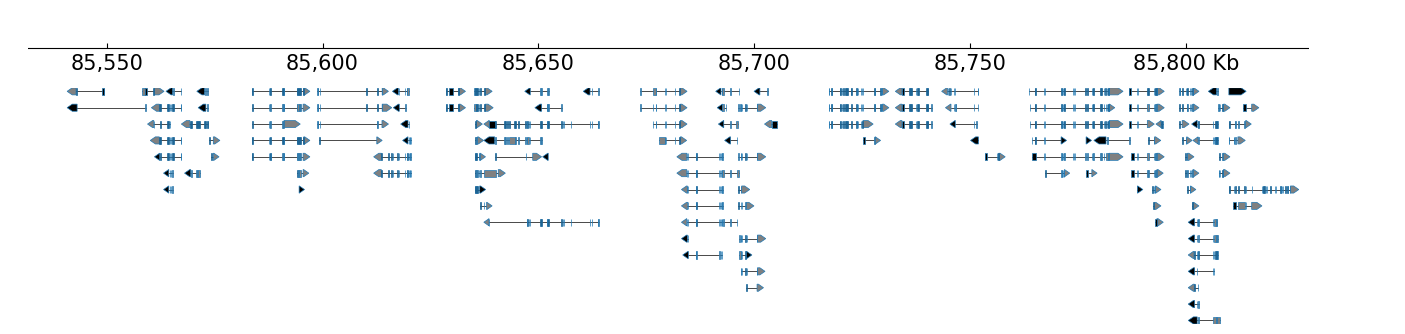

In [23]:
frame = XAxis() + BED(f"{ANNOT_DIR}/GRCm39_GENCODE_VM27_ClearTxNames.bed") + TrackHeight(6)

frame.plot("chr8:85531867-85828373")

[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27_ClearTxNames.bed.bgz.tbi


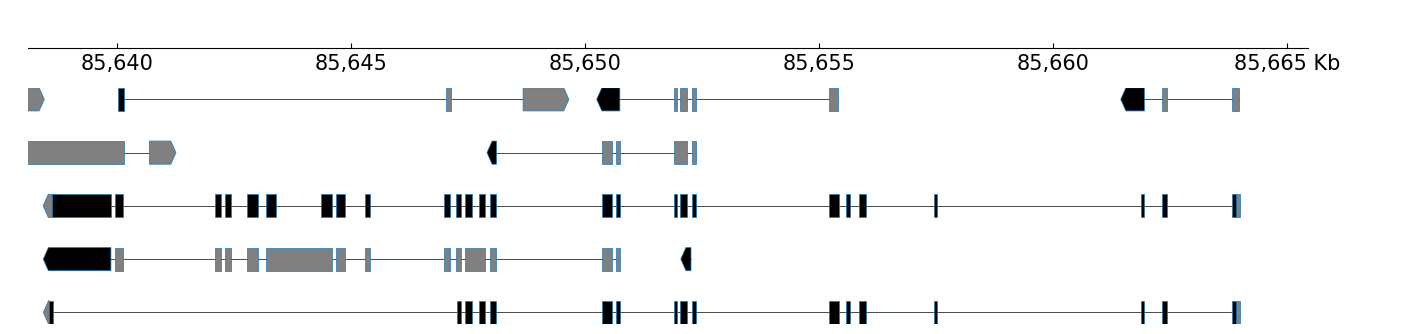

In [25]:
frame.plot("chr8:85638106-85665457")

In [33]:
##cmap="RdYlBu_r"
locus = [("chr8", 85640000), ("chr8", 85645000)]
frame = XAxis() + HiCMat("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool",
                         resolution=100, depth_ratio=0.5, style = "matrix",balance=True, cmap="YlOrRd") + Title("Mast1 Gene") + \
    Spacer(0.5) + \
    BED(f"{ANNOT_DIR}/GRCm39_GENCODE_VM27_ClearTxNames.bed") + Title("BED Track") + TrackHeight(10) #+ Vlines(locus, line_width=2)

[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27_ClearTxNames.bed.bgz.tbi


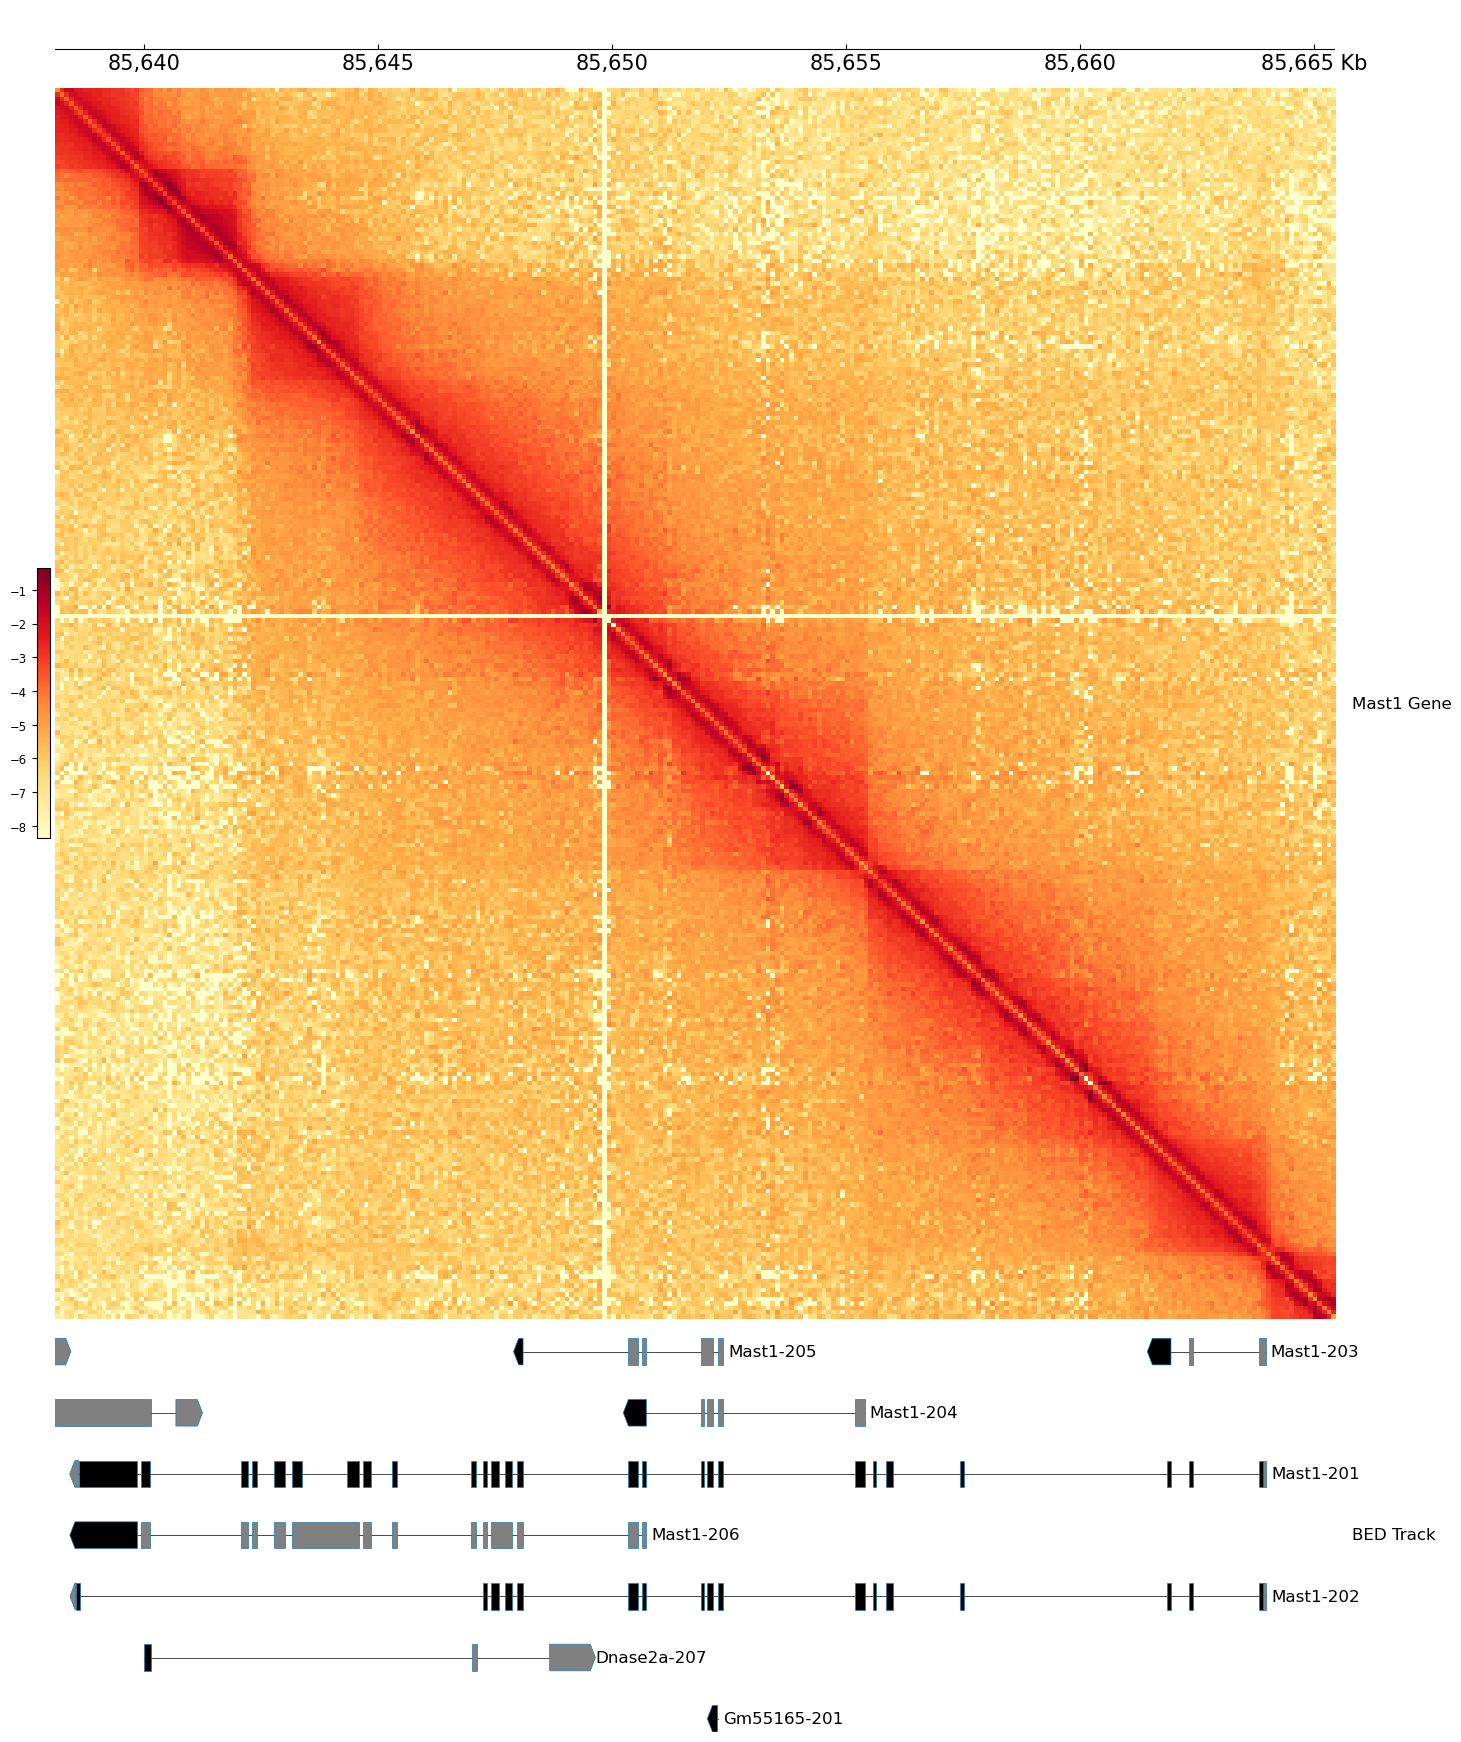

<Figure size 600x400 with 0 Axes>

In [34]:
plt.figure(figsize=(6, 4))

frame.plot("chr8:85638106-85665457")


[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27_ClearTxNames.bed.bgz.tbi


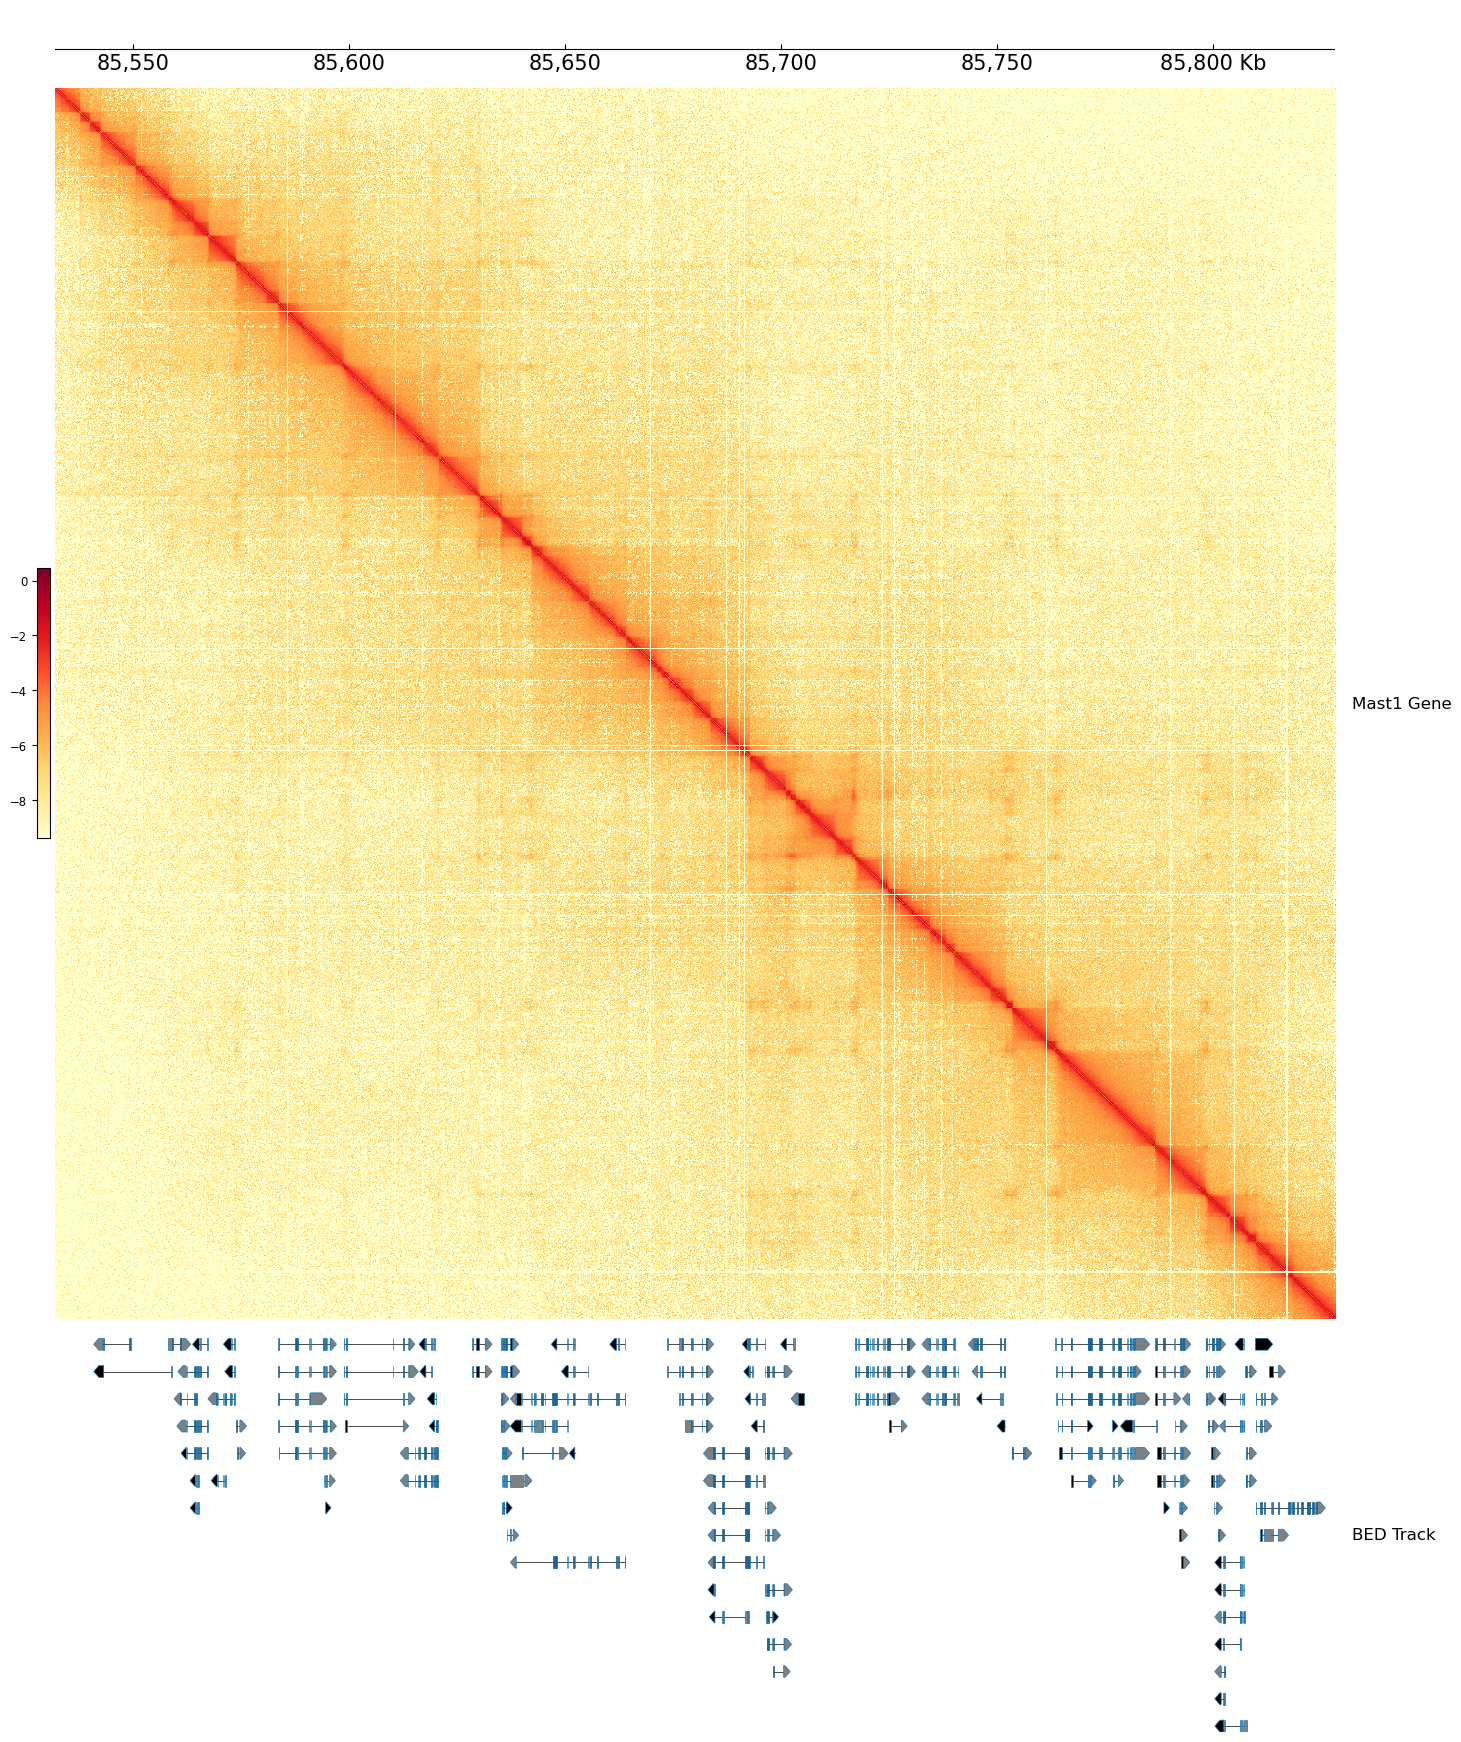

In [35]:
frame.plot('chr8:85531867-85828373')